## Explore the inverse CDF sampling process

!!sampling by inverse CDF falls back to its orignal pdf.

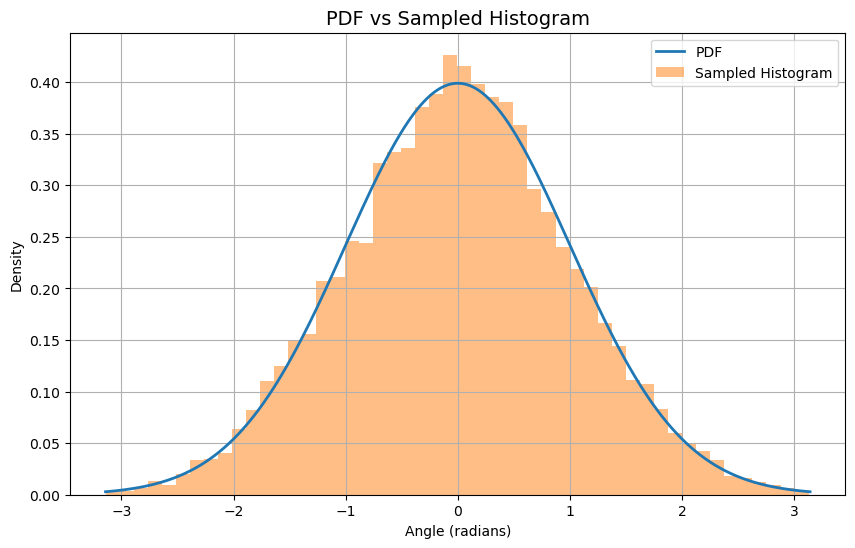

In [1]:
# code visualization
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define a Gaussian-like PDF within [-pi, pi]
def pdf(x):
    return norm.pdf(x, loc=0, scale=1)  # Standard Gaussian centered at 0

# Define the domain for [-pi, pi]
domain = np.linspace(-np.pi, np.pi, 1000)
pdf_values = pdf(domain)

# Calculate the CDF by integrating the PDF
cdf_values = np.cumsum(pdf_values)
cdf_values /= cdf_values[-1]  # Normalize the CDF to [0, 1]

# Inverse CDF function using interpolation
def inverse_cdf(u):
    return np.interp(u, cdf_values, domain)

# Generate samples using inverse CDF sampling
n_samples = 10000
uniform_samples = np.random.rand(n_samples)
sampled_angles = inverse_cdf(uniform_samples)

# Plot the PDF and histogram of samples
plt.figure(figsize=(10, 6))
plt.plot(domain, pdf_values, label="PDF", lw=2)
plt.hist(sampled_angles, bins=50, density=True, alpha=0.5, label="Sampled Histogram")
plt.title("PDF vs Sampled Histogram", fontsize=14)
plt.xlabel("Angle (radians)")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()
